In [3]:
import pandas as pd 
import numpy as np

In [4]:
experiment_results = pd.read_csv("experiment_results.csv")

In [3]:
experiment_results.head()

,num_exits,num_actors,staff_percentage,time_steps,algorithm,Staff_evacuated,Staff_deceased,Staff_avg_time,Staff_evac_rate,Adult_evacuated,...,Patient_deceased,Patient_avg_time,Patient_evac_rate,Child_evacuated,Child_deceased,Child_avg_time,Child_evac_rate,total_evacuated,total_deceased,simulation_time
0,1,50,15,250,AStar,6,1,0.002303,85.714286,15,...,1,0.002071,80.0,6,1,0.002362,85.714286,31,3,2.663131
1,1,50,15,250,Dijkstra,7,0,0.010063,100.000000,13,...,0,0.009023,100.0,5,0,0.014113,100.000000,29,0,14.145021
2,1,50,15,375,AStar,7,0,0.002528,100.000000,16,...,0,0.002834,100.0,9,0,0.003738,100.000000,34,0,4.372344
3,1,50,15,375,Dijkstra,7,0,0.011832,100.000000,17,...,0,0.011702,100.0,10,0,0.015081,100.000000,38,0,15.154011
4,1,50,15,500,AStar,5,2,0.007246,71.428571,13,...,2,0.006703,75.0,13,1,0.007413,92.857143,37,5,7.447628


In [4]:
experiment_results.columns

Index(['num_exits', 'num_actors', 'staff_percentage', 'time_steps',
       'algorithm', 'Staff_evacuated', 'Staff_deceased', 'Staff_avg_time',
       'Staff_evac_rate', 'Adult_evacuated', 'Adult_deceased',
       'Adult_avg_time', 'Adult_evac_rate', 'Patient_evacuated',
       'Patient_deceased', 'Patient_avg_time', 'Patient_evac_rate',
       'Child_evacuated', 'Child_deceased', 'Child_avg_time',
       'Child_evac_rate', 'total_evacuated', 'total_deceased',
       'simulation_time'],
      dtype='object')

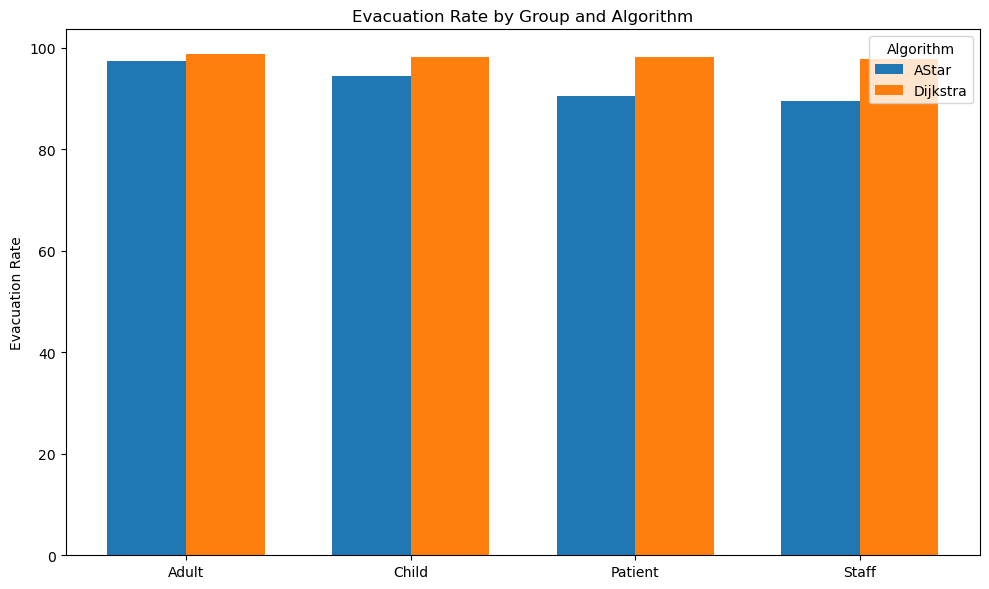

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

melted = pd.melt(
    experiment_results,
    id_vars=['algorithm'],
    value_vars=['Staff_evac_rate', 'Adult_evac_rate', 'Patient_evac_rate', 'Child_evac_rate'],
    var_name='Group',
    value_name='Evacuation Rate'
)
melted['Group'] = melted['Group'].str.replace('_evac_rate', '').str.capitalize()

grouped = melted.groupby(['Group', 'algorithm']).mean().reset_index()

groups = grouped['Group'].unique()
algorithms = grouped['algorithm'].unique()

x = np.arange(len(groups))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

for i, algorithm in enumerate(algorithms):
    subset = grouped[grouped['algorithm'] == algorithm]
    ax.bar(x + i*width - width/2, subset['Evacuation Rate'], width, label=algorithm)

ax.set_ylabel('Evacuation Rate')
ax.set_title('Evacuation Rate by Group and Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend(title='Algorithm')

plt.tight_layout()
plt.show()


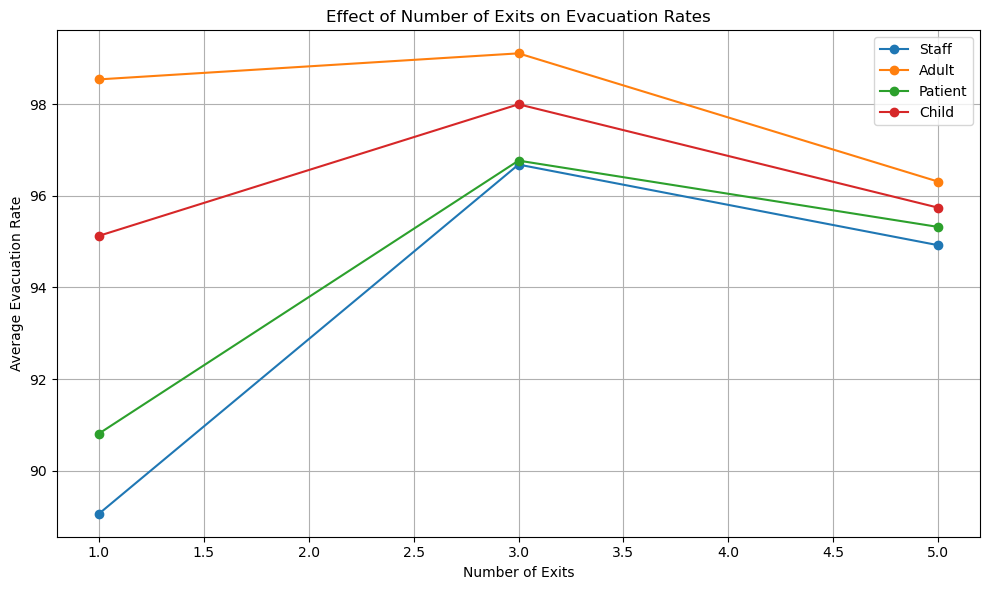

In [8]:
import matplotlib.pyplot as plt

# Group by num_exits and get average evacuation rates
exit_grouped = experiment_results.groupby('num_exits')[['Staff_evac_rate', 'Adult_evac_rate', 'Patient_evac_rate', 'Child_evac_rate']].mean()

plt.figure(figsize=(10, 6))

plt.plot(exit_grouped.index, exit_grouped['Staff_evac_rate'], marker='o', label='Staff')
plt.plot(exit_grouped.index, exit_grouped['Adult_evac_rate'], marker='o', label='Adult')
plt.plot(exit_grouped.index, exit_grouped['Patient_evac_rate'], marker='o', label='Patient')
plt.plot(exit_grouped.index, exit_grouped['Child_evac_rate'], marker='o', label='Child')

plt.xlabel('Number of Exits')
plt.ylabel('Average Evacuation Rate')
plt.title('Effect of Number of Exits on Evacuation Rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


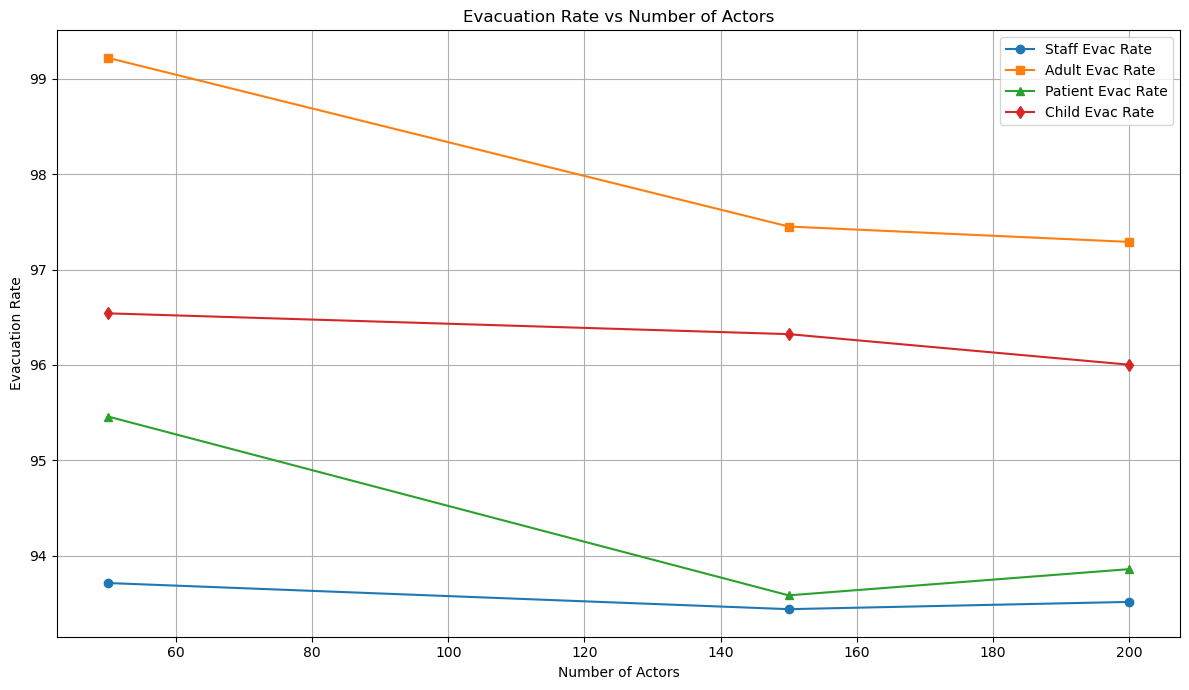

In [12]:
import matplotlib.pyplot as plt

# Group by number of actors (you can round or bin if you want later)
grouped_by_actors = experiment_results.groupby('num_actors').mean(numeric_only=True)

# Plot
plt.figure(figsize=(12, 7))

plt.plot(grouped_by_actors.index, grouped_by_actors['Staff_evac_rate'], marker='o', label='Staff Evac Rate')
plt.plot(grouped_by_actors.index, grouped_by_actors['Adult_evac_rate'], marker='s', label='Adult Evac Rate')
plt.plot(grouped_by_actors.index, grouped_by_actors['Patient_evac_rate'], marker='^', label='Patient Evac Rate')
plt.plot(grouped_by_actors.index, grouped_by_actors['Child_evac_rate'], marker='d', label='Child Evac Rate')

plt.xlabel('Number of Actors')
plt.ylabel('Evacuation Rate')
plt.title('Evacuation Rate vs Number of Actors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


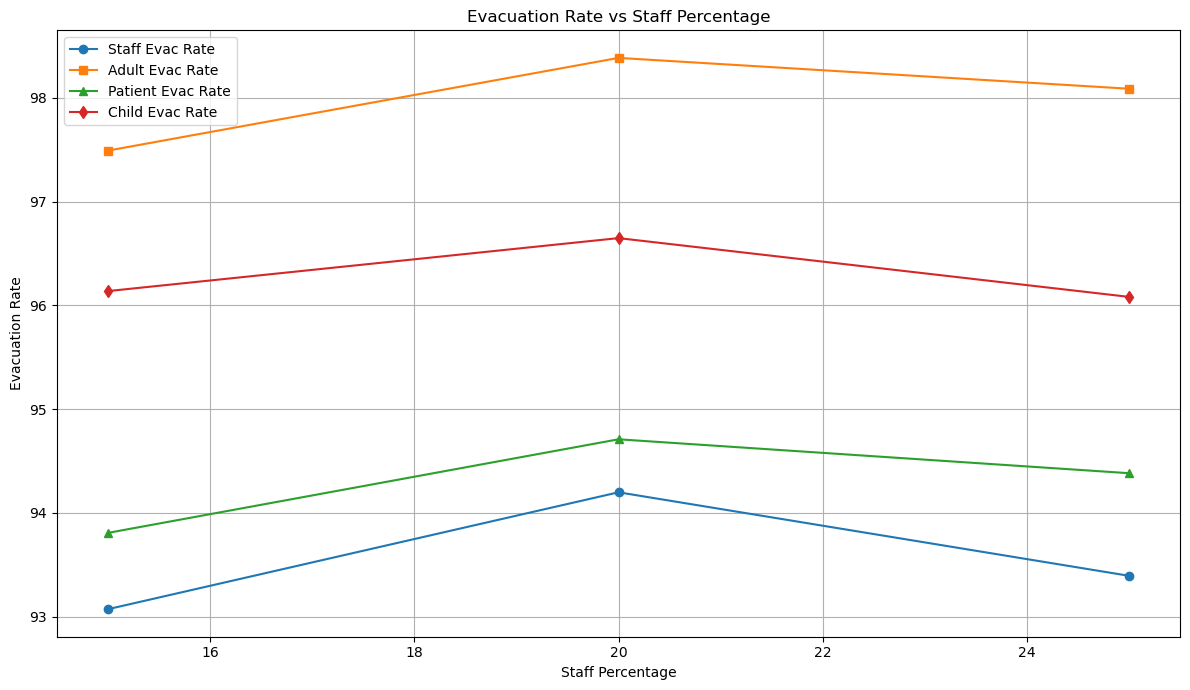

In [5]:
import matplotlib.pyplot as plt

# Group by number of actors (you can round or bin if you want later)
grouped_by_actors = experiment_results.groupby('staff_percentage').mean(numeric_only=True)

# Plot
plt.figure(figsize=(12, 7))

plt.plot(grouped_by_actors.index, grouped_by_actors['Staff_evac_rate'], marker='o', label='Staff Evac Rate')
plt.plot(grouped_by_actors.index, grouped_by_actors['Adult_evac_rate'], marker='s', label='Adult Evac Rate')
plt.plot(grouped_by_actors.index, grouped_by_actors['Patient_evac_rate'], marker='^', label='Patient Evac Rate')
plt.plot(grouped_by_actors.index, grouped_by_actors['Child_evac_rate'], marker='d', label='Child Evac Rate')

plt.xlabel('Staff Percentage')
plt.ylabel('Evacuation Rate')
plt.title('Evacuation Rate vs Staff Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()